### Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### Titanic dataset

In [2]:
# Load Titanic Dataset
titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Calculate statistical moments for the Titanic dataset
moments = titanic.describe().T
moments['median'] = titanic.median()
moments['skewness'] = titanic.skew()
moments['kurtosis'] = titanic.kurt()

# Calculate the correlation matrix
correlation_matrix = titanic.select_dtypes(include='number').corr()

# Display the results
moments, correlation_matrix

C:\Users\bonagiri\AppData\Local\Temp\ipykernel_20204\827558930.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moments['median'] = titanic.median()
C:\Users\bonagiri\AppData\Local\Temp\ipykernel_20204\827558930.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moments['skewness'] = titanic.skew()
C:\Users\bonagiri\AppData\Local\Temp\ipykernel_20204\827558930.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moments['kurtosis'] = titanic.kurt()


(             count        mean         std   min       25%       50%    75%  \
 PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
 Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
 Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
 Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
 SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
 Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
 Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   
 
                   max    median  skewness   kurtosis  
 PassengerId  891.0000  446.0000  0.000000  -1.200000  
 Survived       1.0000    0.0000  0.478523  -1.775005  
 Pclass         3.0000    3.0000 -0.630548  -1.280015  
 Age           80.0000   28.0000  0.389108   0.178274  
 SibSp          8.0000    0.0000  3.695352  17.880420  
 Parch          6.0000

In [4]:
titanic.info(), titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  )

In [5]:
# Preprocessing
titanic.dropna(subset=["Age", "Fare"], inplace=True)  
titanic['Survived'] = titanic['Survived'].astype(int)  

### Bar plot

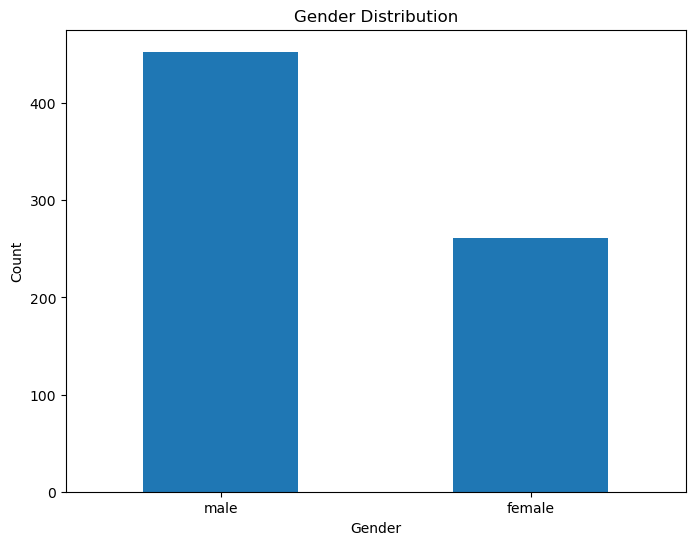

In [6]:
# Function for bar chart
def plot_gender_distribution(data):
    """
    Plot a bar chart showing the gender distribution.
    """
    gender_counts = data['Sex'].value_counts()
    gender_counts.plot(kind='bar', figsize=(8, 6))
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

# Example usage
plot_gender_distribution(titanic)

### Line plot

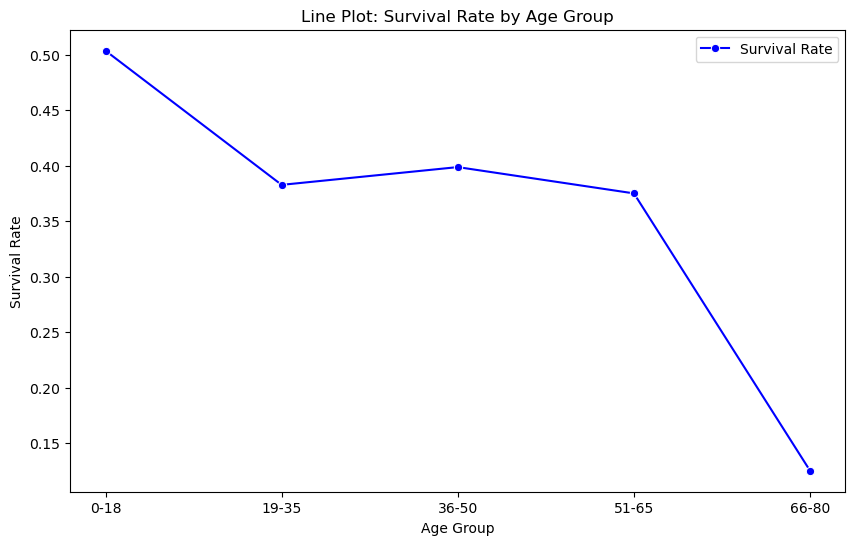

In [7]:
# Function for creating line plots
def plot_lineplots(data):
    """
    Create a line plot for survival rate by age group.
    """
    age_groups = pd.cut(data['Age'], bins=[0, 18, 35, 50, 65, 80], labels=['0-18', '19-35', '36-50', '51-65', '66-80'])
    grouped = data.groupby(age_groups)['Survived'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=grouped['Age'], y=grouped['Survived'], marker='o', color='blue', label='Survival Rate')
    plt.title("Line Plot: Survival Rate by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Survival Rate")
    plt.legend()
    plt.show()

# Example usage
plot_lineplots(titanic)

### Box plot

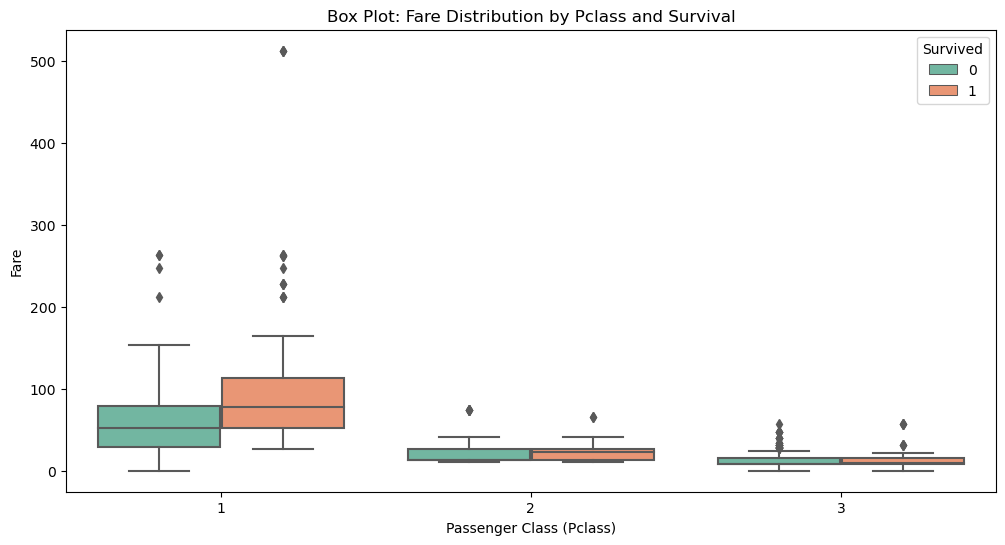

In [8]:
# Function for creating box plots
def plot_boxplots(data):
    """
    Create a box plot of fare distribution by passenger class and survival.
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data, palette='Set2')
    plt.title("Box Plot: Fare Distribution by Pclass and Survival")
    plt.xlabel("Passenger Class (Pclass)")
    plt.ylabel("Fare")
    plt.legend(title="Survived")
    plt.show()

# Example usage
plot_boxplots(titanic)  

### Clustering

In [9]:
# Standardize numerical columns for clustering
scaler = StandardScaler()
titanic[['Age_scaled', 'Fare_scaled']] = scaler.fit_transform(titanic[['Age', 'Fare']])

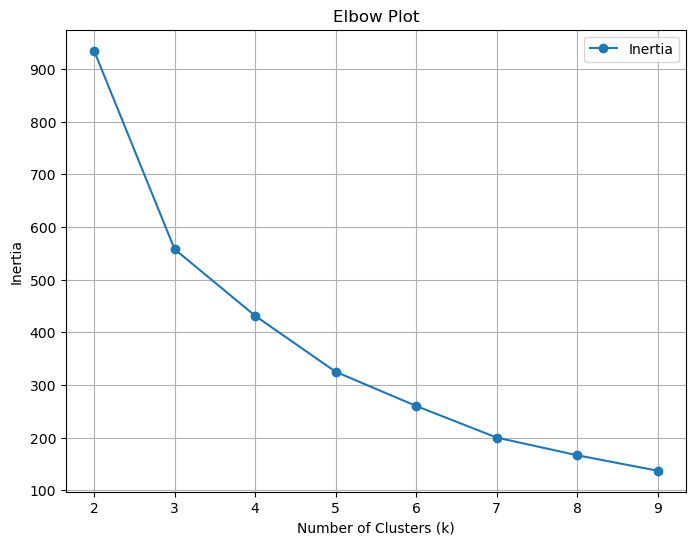

In [10]:
# Function for k-means clustering and elbow plot
def plot_elbow(data):
    inertia = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data[['Age_scaled', 'Fare_scaled']])
        inertia.append(kmeans.inertia_)
        
    # Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 10), inertia, marker='o', label='Inertia')
    plt.title("Elbow Plot")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.legend()
    plt.show()
        
plot_elbow(titanic)        

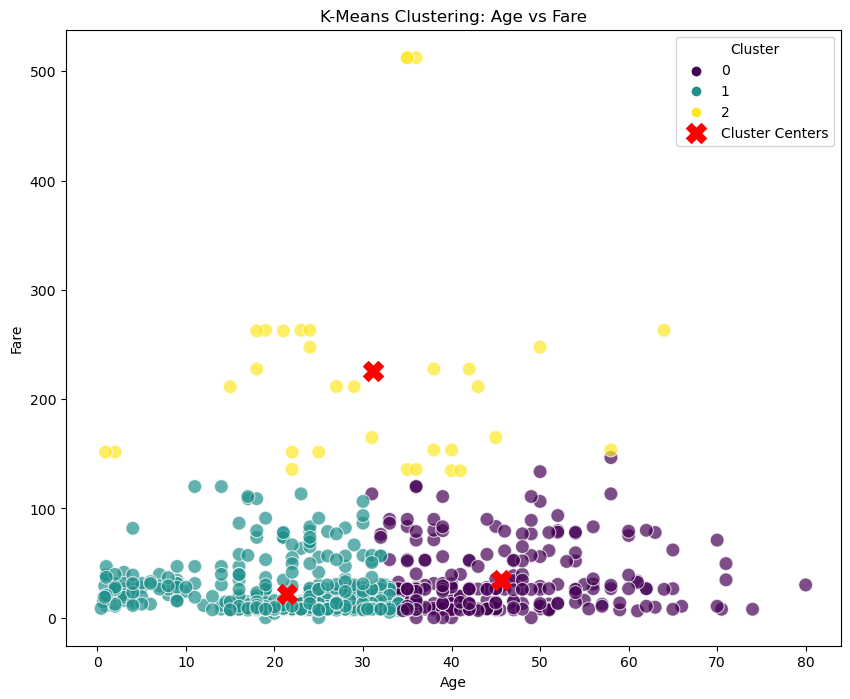

In [11]:
# Function for applying K-means clustering
def apply_kmeans(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['Age_scaled', 'Fare_scaled']])
    return data, kmeans

# Function for visualizing K-means clustering
def plot_kmeans(data, kmeans):
    """
    Plot K-means clustering results with cluster centers.
    
    Parameters:
    - data (pd.DataFrame): Input dataset with 'Cluster' column.
    - kmeans (KMeans): Fitted KMeans model.
    """
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='Age', y='Fare', hue='Cluster', data=data, palette='viridis', alpha=0.7, s=100
    )
    # Rescale cluster centers for plotting
    centers_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(centers_unscaled[:, 0], centers_unscaled[:, 1], color="red", s=200, label="Cluster Centers", marker="X")
    plt.title("K-Means Clustering: Age vs Fare")
    plt.xlabel("Age")
    plt.ylabel("Fare")
    plt.legend(title='Cluster')
    plt.show()
    
# Apply K-means clustering and visualize
titanic, kmeans_model = apply_kmeans(titanic, n_clusters=3)
plot_kmeans(titanic, kmeans_model)

### Fitting

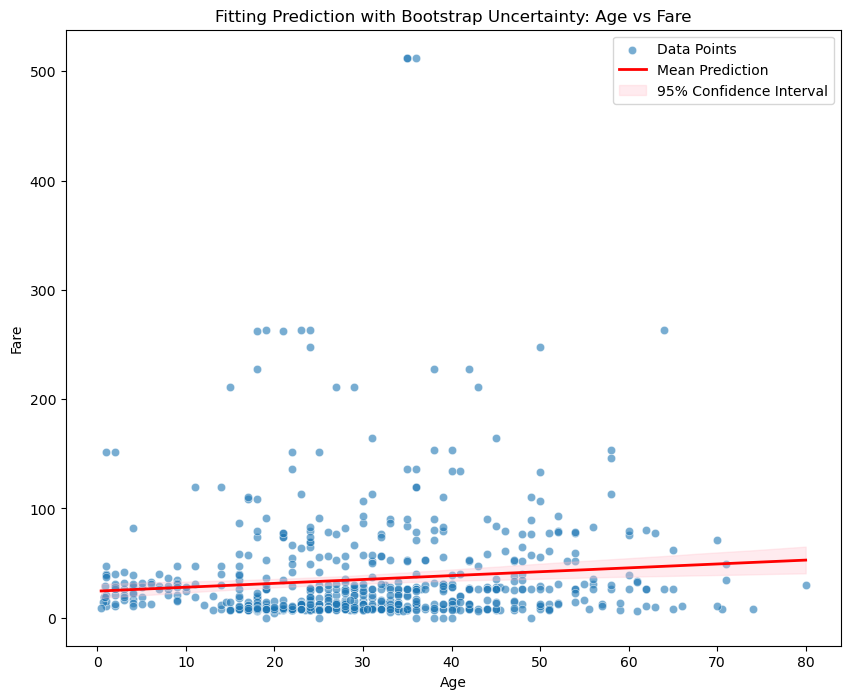

In [12]:
# Function for linear fitting

def fitting_prediction_with_bootstrap(data, num_bootstrap=1000):
    """
    Perform linear regression with bootstrap uncertainty estimation.
    
    Parameters:
    - data (pd.DataFrame): Dataset containing 'Age' and 'Fare' columns.
    - num_bootstrap (int): Number of bootstrap samples.
    """
    # Extract features and target
    X = data[['Age']].values
    y = data['Fare'].values

    # Fit the initial linear regression model
    reg = LinearRegression()
    reg.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

    # Bootstrap resampling
    predictions = []
    for _ in range(num_bootstrap):
        # Resample the data with replacement
        indices = np.random.choice(range(len(X)), size=len(X), replace=True)
        X_resampled = X[indices]
        y_resampled = y[indices]
        
        # Fit a new model on the resampled data
        reg_resampled = LinearRegression()
        reg_resampled.fit(X_resampled, y_resampled)
        predictions.append(reg_resampled.predict(X_pred))
    
    # Compute mean and percentiles of predictions
    predictions = np.array(predictions)
    y_pred_mean = predictions.mean(axis=0)
    y_pred_lower = np.percentile(predictions, 2.5, axis=0)
    y_pred_upper = np.percentile(predictions, 97.5, axis=0)

    # Plot results
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data['Age'], y=data['Fare'], alpha=0.6, label="Data Points")
    plt.plot(X_pred, y_pred_mean, color='red', linewidth=2, label="Mean Prediction")
    plt.fill_between(
        X_pred.flatten(),
        y_pred_lower,
        y_pred_upper,
        color='pink', alpha=0.3, label="95% Confidence Interval"
    )
    plt.title("Fitting Prediction with Bootstrap Uncertainty: Age vs Fare")
    plt.xlabel("Age")
    plt.ylabel("Fare")
    plt.legend()
    plt.show()

# Example usage
fitting_prediction_with_bootstrap(titanic)